# <font color=blue>Solutions for "Data Exploration - Multivariate Analysis"</font>

In this assignment, you will work on the `Students Performance` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import ttest_ind
import warnings

warnings.filterwarnings('ignore')

In [2]:
student_df = pd.read_csv('../data/StudentsPerformance.csv')

**(1)** Does the performance in the exams vary according to gender, origin and education level of parents?

In [3]:
student_df.groupby("gender").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [4]:
ttest_result = ttest_ind(student_df[student_df.gender == "female"][["math score", "reading score", "writing score"]],
                         student_df[student_df.gender == "male"][["math score", "reading score", "writing score"]])

print("p value for math    : {:.10f}".format(ttest_result[1][0]))
print("p value for reading : {:.10f}".format(ttest_result[1][1]))
print("p value for writing : {:.10f}".format(ttest_result[1][2]))

p value for math    : 0.0000000912
p value for reading : 0.0000000000
p value for writing : 0.0000000000


- It seems that females are more successful at reading and writing whereas males are more successful at math. The t-tests justify that the differences are statistically significant.

In [5]:
student_df.groupby("race/ethnicity").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [6]:
# Test whether group differences are significant.
ethnicities = student_df["race/ethnicity"].unique()
grouped_df = student_df.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(ethnicities)):
        for j in range(i+1, len(ethnicities)):
            test_result = ttest_ind(student_df[student_df["race/ethnicity"] == ethnicities[i]][var],
                                    student_df[student_df["race/ethnicity"] == ethnicities[j]][var])
            print("t-test p value between {} and {} : {:.10f}".format(ethnicities[i], ethnicities[j], test_result[1] ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test p value between group B and group C : 0.4647708939
t-test p value between group B and group A : 0.3503415962
t-test p value between group B and group D : 0.0048861971
t-test p value between group B and group E : 0.0000000050
t-test p value between group C and group A : 0.1104381075
t-test p value between group C and group D : 0.0158883496
t-test p value between group C and group E : 0.0000000019
t-test p value between group A and group D : 0.0009068636
t-test p value between group A and group E : 0.0000000108
t-test p value between group D and group E : 0.0000231876
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test p value between group B and group C : 0.1866592809
t-test p value between group B and group A : 0.1738735513
t-test p value between group B 

- Taking into account the t statistics, there are significant differences except between the groups A, B and C.

In [7]:
student_df.groupby("parental level of education").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [8]:
# Test whether group differences are significant.
level_of_education = student_df["parental level of education"].unique()
grouped_df = student_df.groupby("parental level of education")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(level_of_education)):
        for j in range(i+1, len(level_of_education)):
            test_result = ttest_ind(student_df[student_df["parental level of education"] == level_of_education[i]][var],
                                    student_df[student_df["parental level of education"] == level_of_education[j]][var])
            print("t-test p value between {} and {} : {:.10f}".format(level_of_education[i], level_of_education[j], test_result[1] ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test p value between bachelor's degree and some college : 0.1715122422
t-test p value between bachelor's degree and master's degree : 0.8819757825
t-test p value between bachelor's degree and associate's degree : 0.3802075782
t-test p value between bachelor's degree and high school : 0.0000299653
t-test p value between bachelor's degree and some high school : 0.0015409193
t-test p value between some college and master's degree : 0.2176195681
t-test p value between some college and associate's degree : 0.5876182809
t-test p value between some college and high school : 0.0004349800
t-test p value between some college and some high school : 0.0163243616
t-test p value between master's degree and associate's degree : 0.4009993636
t-test p value between master's degree and high school : 0.0005709292
t-test p value between master's degree and some high scho

- There are some significant differences between some groups like master's degree and high school.

**(2)** Does lunch type have a relationship with exam performances? How can you explain this, if any?

In [9]:
student_df.groupby("lunch").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [10]:
ttest_result = ttest_ind(student_df[student_df.lunch == "free/reduced"][["math score", "reading score", "writing score"]],
          student_df[student_df.lunch == "standard"][["math score", "reading score", "writing score"]])

print("p value for math    : {:.10f}".format(ttest_result[1][0]))
print("p value for reading : {:.10f}".format(ttest_result[1][1]))
print("p value for writing : {:.10f}".format(ttest_result[1][2]))

p value for math    : 0.0000000000
p value for reading : 0.0000000000
p value for writing : 0.0000000000


Yes, students who have standard lunch are more successful than the others.

**(3)** Does the preparation courses have an impact on exam performance?

In [11]:
student_df.groupby("test preparation course").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [12]:
ttest_result = ttest_ind(student_df[student_df["test preparation course"] == "completed"][["math score", "reading score", "writing score"]],
                         student_df[student_df["test preparation course"] == "none"][["math score", "reading score", "writing score"]])

print("p value for math    : {:.10f}".format(ttest_result[1][0]))
print("p value for reading : {:.10f}".format(ttest_result[1][1]))
print("p value for writing : {:.10f}".format(ttest_result[1][2]))

p value for math    : 0.0000000154
p value for reading : 0.0000000000
p value for writing : 0.0000000000


Yes, those who completed the test preparation course are more successfull than the others.

**(4)** Which lessons are most correlated with each other?

In [13]:
student_df[["math score", "reading score", "writing score"]].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


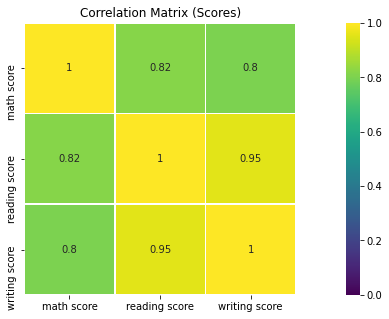

In [14]:
plt.figure(figsize=(18,5))

corr_ = student_df[["math score", "reading score", "writing score"]].corr()
sns.heatmap(corr_, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Scores)")

plt.show()

Reading and writing are more correlated than any other combination.